# 오늘의 미션
## Feature Engineering
- Feature Engineering은 데이터의 특성(Feature)를 만들거나 변형하는 과정을 의미합니다. Feature Engineering을 통해 다음과 같은 효과를 불러올 수 있습니다. [다음 글](https://www.kaggle.com/code/ryanholbrook/what-is-feature-engineering)에서 쉽게 설명하고 있으니 참고해보시죠!

    - **데이터의 표현력 증대:** 기존에 없던 새로운 정보를 추출하여 데이터에 더 많은 의미를 부여합니다.
    
    - **모델의 성능 향상:** 모델이 데이터의 패턴을 더 쉽게 학습하여 예측 정확도가 높아집니다.
    
    
- Feature Engineering을 직접 실습해봅시다. 타이타닉 데이터셋을 불러와서 `sibsp` (형제자매/배우자수)와 `parch` (부모/자녀 수)를 더해 `family_size` 컬럼을 만들어 봅시다.

### family_size 컬럼 만들기

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset('titanic')

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [230]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [231]:
data["family_size"] = data["sibsp"] + data["parch"] + 1
data['alone'] = (data['family_size'] == 1).astype(int)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,0,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,1,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,1,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,0,4
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,1,1


In [232]:
data.isna().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
family_size    0.000000
dtype: float64

In [233]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,0,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,1,1


In [234]:
data.describe()

,survived,pclass,age,sibsp,parch,fare,alone,family_size
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694,1.904602
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,11.000000


<AxesSubplot:xlabel='family_size', ylabel='Count'>

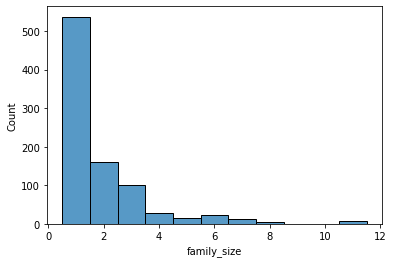

In [235]:
sns.histplot(data=data, x="family_size", discrete=True)

In [236]:
# survived 컬럼과 다른 컬럼과의 상관계수 확인
data = pd.get_dummies(data, columns=['sex', 'embarked'], drop_first=True)
num = data.select_dtypes(include="number")
corr = num.corr()

corr_survived = corr["survived"].drop("survived").sort_values(ascending=False)
corr_survived

fare           0.257307
parch          0.081629
family_size    0.016639
embarked_Q     0.003650
sibsp         -0.035322
age           -0.077221
embarked_S    -0.155660
alone         -0.203367
pclass        -0.338481
sex_male      -0.543351
Name: survived, dtype: float64

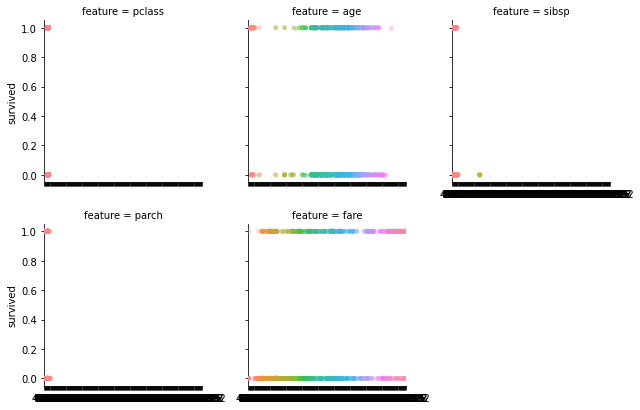

In [239]:
# 데이터 시각화로 분포 확인
df = sns.load_dataset("titanic")

# 숫자컬럼 중 survived 제외
num_cols = df.select_dtypes(include="number").columns.tolist()
num_cols = [c for c in num_cols if c != "survived"]

plot_df = df[["survived"] + num_cols].melt(
    id_vars="survived",
    var_name="feature",
    value_name="value"
).dropna()

g = sns.catplot(
    data=plot_df,
    x="value", y="survived",
    col="feature", col_wrap=3,
    kind="strip", jitter=0.25, alpha=0.35, height=3
)
g.set_axis_labels("", "survived")
plt.show()

### 원본데이터 로지스틱 회귀 모델 학습

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score|

In [148]:
# 원본 데이터 준비
df_origin = sns.load_dataset('titanic')
df_origin.dropna(subset=['age', 'embarked'], inplace=True) # 결측치 제거
df_origin = pd.get_dummies(df_origin, columns=['sex', 'embarked'], drop_first=True)

In [149]:
# 피쳐와 타깃 분리
X_origin = df_origin[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y_origin = df_origin['survived']


In [150]:
# 학습과 테스트를 위한 데이터셋 분리
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_origin, y_origin, test_size=0.2, random_state=42)

In [151]:
# 로지스틱 회귀 모델 준비
model = LogisticRegression(max_iter=1000)

In [152]:
# 모델 학습 및 예측
model.fit(X_train_o, y_train_o)
pred_o = model.predict(X_test_o)

In [153]:
# 예측 결과와 테스트 정답값을 비교해서 정확도 구하기
accuracy_o = accuracy_score(y_test_o, pred_o)
accuracy_o

0.7972027972027972

### Feature Engineering
1. family_size를 포함시키는 대신 sibsp, parch는 빼고 학습 (다중공선성 문제 해결)
2. 혼자인지 아닌지 여부를 이진분류(True/False)로 나누기

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [205]:
df_rev = sns.load_dataset('titanic')
df_rev.dropna(subset=['age', 'embarked'], inplace=True) # 결측치 제거
df_rev = pd.get_dummies(df_rev, columns=['sex', 'embarked'], drop_first=True)
df_rev

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,1,0,1
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,0,0,0
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,0,0,1
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,0,0,1
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,Third,woman,False,NaN,Queenstown,no,False,0,1,0
886,0,2,27.0,0,0,13.0000,Second,man,True,NaN,Southampton,no,True,1,0,1
887,1,1,19.0,0,0,30.0000,First,woman,False,B,Southampton,yes,True,0,0,1
889,1,1,26.0,0,0,30.0000,First,man,True,C,Cherbourg,yes,True,1,0,0


In [156]:
# family_size 컬럼 및 혼자인지 여부 확인 컬럼 추가
df_rev["family_size"] = df_rev["sibsp"] + df_rev["parch"] + 1
df_rev['alone'] = (df_rev['family_size'] == 1).astype(int)  # 혼자면 1, 아니면 0

# 피쳐/ 타겟 분리
X_rev = df_rev[['pclass', 'age', 'family_size', 'alone','fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y_rev = df_rev['survived']

# 학습과 테스트를 위한 데이터셋 분리
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 준비
model = LogisticRegression(max_iter=1000)

# 모델 학습 및 예측
model.fit(X_train_r, y_train_r)
pred_r = model.predict(X_test_r)

# 예측 결과와 테스트 정답값을 비교해서 정확도 구하기
accuracy_r = accuracy_score(y_test_r, pred_r)
accuracy_r

# 예측 결과 -> 오히려 원본 데이터 보다 하락

0.7622377622377622

In [157]:
# 예측도가 오히려 더 떨어졌으므로 family_size 빼고 alone 만 쓰기 
df_rev = sns.load_dataset('titanic')
df_rev.dropna(subset=['age', 'embarked'], inplace=True) # 결측치 제거
df_rev = pd.get_dummies(df_rev, columns=['sex', 'embarked'], drop_first=True)

# 혼자인지 여부 확인 컬럼 추가
df_rev["family_size"] = df_rev["sibsp"] + df_rev["parch"] + 1
df_rev['alone'] = (df_rev['family_size'] == 1).astype(int)  # 혼자면 1, 아니면 0

# 피쳐/ 타겟 분리
X_rev = df_rev[['pclass', 'age', 'alone','fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y_rev = df_rev['survived']

# 학습과 테스트를 위한 데이터셋 분리
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 준비
model = LogisticRegression(max_iter=1000)

# 모델 학습 및 예측
model.fit(X_train_r, y_train_r)
pred_r = model.predict(X_test_r)

# 예측 결과와 테스트 정답값을 비교해서 정확도 구하기
accuracy_r = accuracy_score(y_test_r, pred_r)
accuracy_r

# 예측 결과 -> 원본데이터와 동일하게 나옴

0.7972027972027972

In [197]:
# 상관계수가 높은 컬럼(sex_male, pclass, alone, fare)만 분석
df_rev = sns.load_dataset('titanic')
df_rev.dropna(subset=['age', 'embarked'], inplace=True) # 결측치 제거
df_rev = pd.get_dummies(df_rev, columns=['sex', 'embarked'], drop_first=True)

# 혼자인지 여부 확인 컬럼 추가
df_rev["family_size"] = df_rev["sibsp"] + df_rev["parch"] + 1
df_rev['alone'] = (df_rev['family_size'] == 1).astype(int)  # 혼자면 1, 아니면 0

# 피쳐/ 타겟 분리
X_rev = df_rev[['sex_male','pclass', 'alone','fare']]
y_rev = df_rev['survived']

# 학습과 테스트를 위한 데이터셋 분리
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 준비
model = LogisticRegression(max_iter=1000)

# 모델 학습 및 예측
model.fit(X_train_r, y_train_r)
pred_r = model.predict(X_test_r)

# 예측 결과와 테스트 정답값을 비교해서 정확도 구하기
accuracy_r = accuracy_score(y_test_r, pred_r)
accuracy_r
# 예측 결과 -> 오히려 원본 데이터 보다 하락

0.7482517482517482

In [199]:
# 상관계수가 높은 컬럼 중 pclass,fare 는 서로 연관관계가 있으므로 fare 제외 하고 분석
df_rev = sns.load_dataset('titanic')
df_rev.dropna(subset=['age', 'embarked'], inplace=True) # 결측치 제거
df_rev = pd.get_dummies(df_rev, columns=['sex', 'embarked'], drop_first=True)

# 혼자인지 여부 확인 컬럼 추가
df_rev["family_size"] = df_rev["sibsp"] + df_rev["parch"] + 1
df_rev['alone'] = (df_rev['family_size'] == 1).astype(int)  # 혼자면 1, 아니면 0

# 피쳐/ 타겟 분리
X_rev = df_rev[['sex_male','pclass', 'alone']]
y_rev = df_rev['survived']

# 학습과 테스트를 위한 데이터셋 분리
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 준비
model = LogisticRegression(max_iter=1000)

# 모델 학습 및 예측
model.fit(X_train_r, y_train_r)
pred_r = model.predict(X_test_r)

# 예측 결과와 테스트 정답값을 비교해서 정확도 구하기
accuracy_r = accuracy_score(y_test_r, pred_r)
accuracy_r
# 예측 결과 -> 효과 없음

0.7482517482517482

In [207]:
# 상관계수가 높은 컬럼 중 pclass,fare 는 서로 연관관계가 있으므로 fare 제외 + age 추가
df_rev = sns.load_dataset('titanic')
df_rev.dropna(subset=['age', 'embarked'], inplace=True) # 결측치 제거
df_rev = pd.get_dummies(df_rev, columns=['sex', 'embarked'], drop_first=True)

# 혼자인지 여부 확인 컬럼 추가
df_rev["family_size"] = df_rev["sibsp"] + df_rev["parch"] + 1
df_rev['alone'] = (df_rev['family_size'] == 1).astype(int)  # 혼자면 1, 아니면 0

# 피쳐/ 타겟 분리
X_rev = df_rev[['sex_male','pclass', 'alone', 'age']]
y_rev = df_rev['survived']

# 학습과 테스트를 위한 데이터셋 분리
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 준비
model = LogisticRegression(max_iter=1000)

# 모델 학습 및 예측
model.fit(X_train_r, y_train_r)
pred_r = model.predict(X_test_r)

# 예측 결과와 테스트 정답값을 비교해서 정확도 구하기
accuracy_r = accuracy_score(y_test_r, pred_r)
accuracy_r
# 예측 결과 -> 효과 없음

0.7902097902097902

In [ ]:
# 'sex_male','pclass', 'alone', 'age' 에서 pclass 대신 
df_rev = sns.load_dataset('titanic')
df_rev.dropna(subset=['age', 'embarked'], inplace=True) # 결측치 제거
df_rev = pd.get_dummies(df_rev, columns=['sex', 'embarked'], drop_first=True)

# 혼자인지 여부 확인 컬럼 추가
df_rev["family_size"] = df_rev["sibsp"] + df_rev["parch"] + 1
df_rev['alone'] = (df_rev['family_size'] == 1).astype(int)  # 혼자면 1, 아니면 0

# 피쳐/ 타겟 분리
X_rev = df_rev[['sex_male','pclass', 'alone', 'age']]
y_rev = df_rev['survived']

# 학습과 테스트를 위한 데이터셋 분리
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 준비
model = LogisticRegression(max_iter=1000)

# 모델 학습 및 예측
model.fit(X_train_r, y_train_r)
pred_r = model.predict(X_test_r)

# 예측 결과와 테스트 정답값을 비교해서 정확도 구하기
accuracy_r = accuracy_score(y_test_r, pred_r)
accuracy_r
# 예측 결과 -> 효과 없음